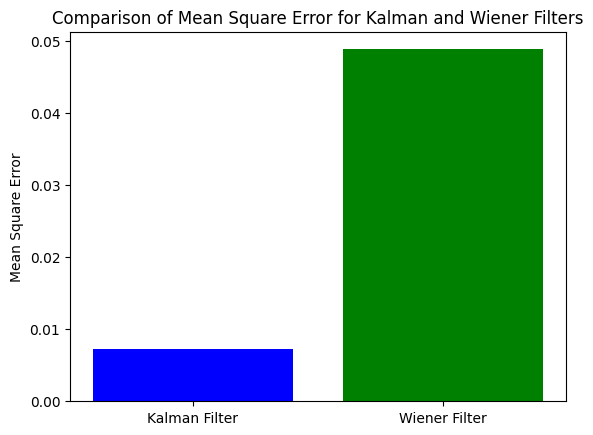

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import toeplitz

class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, initial_state):
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance
        self.state = initial_state
        self.estimate_error = 1

    def predict(self):
        # Prediction step
        self.state = 0.5 * self.state  # Example: Simple decay process
        self.estimate_error += self.process_variance

    def update(self, measurement):
        # Update step
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        self.state += kalman_gain * (measurement - self.state)
        self.estimate_error *= (1 - kalman_gain)

def autocor(x, p):
    rv_ = np.zeros(p)
    for k in range(0,p):
        h = 0;
        for i in range((p),n):
            h = h+(v2[i]*v2[i-k]);
        rv_[k] = h/n;
    return rv_

def crosscor(x, v2, p):
    rxv2_ = np.zeros(p)
    for k in range(1,p):
        h = 0;
        for i in range((p+1),n):
            h = h+(x[i]*v2[i-k]);    
        rxv2_[k] = h/n;
    return rxv2_

def main():
    filename="speech.wav"
    x1, fs = librosa.load(filename, sr=None, mono=False)
    d= (x1[0, :] + x1[1, :]) / 2
    noise=np.random.normal(0, 10 ** (-15 / 20), len(d))  # Add white Gaussian noise
    n=len(d)
    noisy_signal=d+noise

    # Denoise the signal using a Kalman filter
    process_variance = 1e-5  # Tweak this parameter based on your needs
    measurement_variance = 1e-3  # Tweak this parameter based on your needs
    initial_state = noisy_signal[0]  # Initial state as the first value of the noisy signal

    kalman_filter = KalmanFilter(process_variance, measurement_variance, initial_state)
    denoised_signal = np.zeros_like(noisy_signal)

    for i in range(len(noisy_signal)):
        kalman_filter.predict()
        kalman_filter.update(noisy_signal[i])
        denoised_signal[i] = kalman_filter.state
    
    # Calculate MSE for Kalman Filter
    mse_kalman = np.mean((denoised_signal - d) ** 2)

    

    # Generate v1(n), v2(n), and x(n)
    b1 = [1, -0.5, 0.1]
    b2 = [1, -0.3, 0.5]
    v1 = np.convolve(noise, b1, mode='same')
    v2 = np.convolve(noise, b2, mode='same')
    x = d + v1

   # Wiener Filter Implementation
    p = 12  # filter order
    
    rv = np.zeros(p)
    rxv2 = np.zeros(p)
    n=len(d)
    rv = autocor(v2, p)
    rxv2 = crosscor(x, v2, p)
    rv = rv[:p]
    rxv2 = rxv2[:p]
    rv_matrix = toeplitz(rv)
    rxv2_matrix = toeplitz(rxv2)
    w1 = np.linalg.solve(rv_matrix, rxv2_matrix[0, :])
    v1hat = np.convolve(v2, w1, mode='same')
    filtered_signal = x - v1hat

    # Calculate MSE for Wiener Filter
    # Move the filtered_signal calculation inside the main block
    p = 12  # filter order
    rv = np.zeros(p)
    rxv2 = np.zeros(p)

    rv = autocor(v2, p)
    rxv2 = crosscor(x, v2, p)
    rv = rv[:p]
    rxv2 = rxv2[:p]
    rv_matrix = toeplitz(rv)
    rxv2_matrix = toeplitz(rxv2)
    w1 = np.linalg.solve(rv_matrix, rxv2_matrix[0, :])
    v1hat = np.convolve(v2, w1, mode='same')
    filtered_signal = x - v1hat

    mse_wiener = np.mean((filtered_signal - d) ** 2)

    # Plot bar graph
    labels = ['Kalman Filter', 'Wiener Filter']
    mse_values = [mse_kalman, mse_wiener]

    plt.bar(labels, mse_values, color=['blue', 'green'])
    plt.ylabel('Mean Square Error')
    plt.title('Comparison of Mean Square Error for Kalman and Wiener Filters')
    plt.show()




filename="speech.wav"
x1, fs = librosa.load(filename, sr=None, mono=False)
d= (x1[0, :] + x1[1, :]) / 2
noise=np.random.normal(0, 10 ** (-15 / 20), len(d))  # Add white Gaussian noise
n=len(d)


# Generate v1(n), v2(n), and x(n)
b1 = [1, -0.5, 0.1]
b2 = [1, -0.3, 0.5]
v1 = np.convolve(noise, b1, mode='same')
v2 = np.convolve(noise, b2, mode='same')
x = d + v1

# Wiener Filter Implementation
p = 12  # filter order
rv = np.zeros(p)
rxv2 = np.zeros(p)

rv = autocor(v2, p)
rxv2 = crosscor(x, v2, p)


if __name__ == "__main__":
    main()
   